In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket sales.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/supermarket-sales/supermarket sales.csv')
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date   Time      Payment    cogs  gross margin percentage  \
0  01-05-2019  13:08      Ewallet  522.83                 4.761905   
1  03-08-2019  10:29         Cash   76.40                 4.761905   
2  03-03-2019  13:23

In [3]:
#  2. Check for missing values
("\nMissing values per column:")
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [4]:
# unique value 
total_unique_invoices = df['Invoice ID'].nunique()
print("Total number of unique Invoice ID values:",total_unique_invoices)


Total number of unique Invoice ID values: 1000


In [5]:
#  total transaction 
total_transaction = df[df['Total'] > 500]
print("total transaction is greter than 500",total_transaction)   

total transaction is greter than 500       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
4    373-73-7910      A     Yangon        Normal    Male   
5    699-14-3026      C  Naypyitaw        Normal    Male   
7    315-22-5665      C  Naypyitaw        Normal  Female   
14   829-34-3910      A     Yangon        Normal  Female   
..           ...    ...        ...           ...     ...   
988  267-62-7380      C  Naypyitaw        Member    Male   
989  430-53-4718      B   Mandalay        Member    Male   
991  602-16-6955      B   Mandalay        Normal  Female   
996  303-96-2227      B   Mandalay        Normal  Female   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
4         Sports and travel       86.31         7  30.2085   634.3785   
5    Electronic accesso

In [6]:
# transaction each city
transaction_per_city = df['City'].value_counts()
print("Number of transactions in each city:\n", transaction_per_city)

Number of transactions in each city:
 City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


In [7]:
#  Avarage rating for transaction
average_rating = df['Rating'].mean()
print("Average rating across all transactions:", average_rating) 


Average rating across all transactions: 6.975350701402806


In [8]:
# .Filter Rows Where Gender is "Female" and Customer Type is "Member"
filtered_df = df[(df["Gender"] == "Female")&(df["Customer type"]=="Member")]

output_file = "filtered_female_member"
filtered_df.to_csv(output_file,index=False)

print(f"filtered data has been saved to{output_file}")
print(filtered_df)

filtered data has been saved tofiltered_female_member
      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
6    355-53-5943      A     Yangon        Member  Female   
8    665-32-9167      A     Yangon        Member  Female   
9    692-92-5582      B   Mandalay        Member  Female   
10   351-62-0822      B   Mandalay        Member  Female   
..           ...    ...        ...           ...     ...   
969  214-30-2776      B   Mandalay        Member  Female   
970  746-04-1077      B   Mandalay        Member  Female   
982  139-32-4183      A     Yangon        Member  Female   
994  652-49-6720      C  Naypyitaw        Member  Female   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
0         Health and beauty       74.69         7  26.1415  548.9715   
6    Electronic accessories       68.84         6  20.6520  433.6920   
8        

In [9]:
#  Find locations of missing values
condition = df.isna() 
print(condition)
missing_values = df.isna()
missing_locations = []

for row in range(missing_values.shape[0]):
    for col in range(missing_values.shape[1]):
        if missing_values.iloc[row,col]:
            missing_locations.append((row,df.columns[col]))

print("location of missing value(true value):")
for location in missing_locations:
 print(f"row:{location[0]}, column: {location[1]}")   


 df.loc[location[0],location[1]] = average_rating



 output_file = "supermarket sales.csv"
 df.to_csv(output_file,index=False)

     Invoice ID  Branch   City  Customer type  Gender  Product line  \
0         False   False  False          False   False         False   
1         False   False  False          False   False         False   
2         False   False  False          False   False         False   
3         False   False  False          False   False         False   
4         False   False  False          False   False         False   
..          ...     ...    ...            ...     ...           ...   
995       False   False  False          False   False         False   
996       False   False  False          False   False         False   
997       False   False  False          False   False         False   
998       False   False  False          False   False         False   
999       False   False  False          False   False         False   

     Unit price  Quantity  Tax 5%  Total   Date   Time  Payment   cogs  \
0         False     False   False  False  False  False    False  False   

In [10]:
# Convert the 'Date' Column into Datetime Format

if 'Date' in df.columns:
  try:
    df['Date'] = pd.to_datetime(df['Date'],format='mixed',dayfirst=True,errors ='coerce')
    if df['Date'].isna().sum()>0:

      print("some dates could not be parsed.check the format in your dataset")
  except Exception as e:
    print("error", e)
print("successfully converted 'Date' to datetime format.\n")


successfully converted 'Date' to datetime format.



In [11]:
# Extract Year, Month, and Day into Separate Columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [12]:
#  Calculate the Total Quantity Sold for Each Product Line
total_quantity = df.groupby('Product line')['Quantity'].sum()    #reset_index()
print(total_quantity)

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64


In [13]:
# Find the Average Rating for Each City
avg_rating = df.groupby('City')['Rating'].mean()
print(avg_rating)

City
Mandalay     6.826056
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64


In [14]:
# Determine the Total Gross Income for Each Payment Method
total_gross_income = df.groupby('Payment')['gross income'].sum()
print(total_gross_income)

Payment
Cash           5343.170
Credit card    4798.432
Ewallet        5237.767
Name: gross income, dtype: float64


In [15]:
# Which City Had the Highest Total Sales
highest_sales_city = df.groupby('City')['Total'].sum()
print(highest_sales_city)

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


In [16]:
#  Calculate the Average Gross Margin Percentage for Each City
avg_gross_margin = df.groupby('City')['gross margin percentage'].mean()
print(avg_gross_margin)

City
Mandalay     4.761905
Naypyitaw    4.761905
Yangon       4.761905
Name: gross margin percentage, dtype: float64


In [17]:
# revenue
df['revenue'] = df['gross income']+df['cogs']
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  ...  \
0         Health and beauty       74.69         7  26.1415   548.9715  ...   
1    Electronic accessories       15.28         5   3.8200    80.2200  ...   
2        Home and lifestyle       46.33      

In [18]:
# profit margin
df['profit margin'] = df['gross margin percentage'] / df['revenue']*100
print(df)


      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  ...  \
0         Health and beauty       74.69         7  26.1415   548.9715  ...   
1    Electronic accessories       15.28         5   3.8200    80.2200  ...   
2        Home and lifestyle       46.33      

In [19]:
#.filtered time in day format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
earliest_time = df['Time'].min()
evening_time = df['Time'].max()

print("Earliest Time:", earliest_time,"Evening Time:",evening_time)


Earliest Time: 10:00:00 Evening Time: 20:59:00


In [20]:
# Create 'Time of Day' column using a loop
if 'Time' in df.columns:
    time_of_day = [] # List to store new values

    for time in df['Time']:
        if time >= pd.to_datetime("10:00",format='%H:%M').time() and time < pd.to_datetime("12:00", format='%H:%M').time():
            time_of_day.append("Morning")
        elif time > pd.to_datetime('12:00', format='%H:%M').time() and time <= pd.to_datetime('15:00', format='%H:%M').time():
            time_of_day.append("Afternoon")
        elif time >= pd.to_datetime("15:00",format='%H:%M').time() and time < pd.to_datetime("18:00", format='%H:%M').time():
           time_of_day.append("Evening")
        elif time >= pd.to_datetime("18:00",format='%H:%M').time() and time < pd.to_datetime("21:00", format='%H:%M').time():
            time_of_day.append("Night")

time_of_day

['Afternoon',
 'Morning',
 'Afternoon',
 'Night',
 'Morning',
 'Night',
 'Afternoon',
 'Morning',
 'Evening',
 'Afternoon',
 'Night',
 'Evening',
 'Morning',
 'Evening',
 'Night',
 'Evening',
 'Morning',
 'Morning',
 'Night',
 'Evening',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Evening',
 'Night',
 'Evening',
 'Afternoon',
 'Night',
 'Evening',
 'Night',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Night',
 'Evening',
 'Afternoon',
 'Afternoon',
 'Night',
 'Morning',
 'Afternoon',
 'Night',
 'Night',
 'Night',
 'Evening',
 'Evening',
 'Afternoon',
 'Evening',
 'Morning',
 'Evening',
 'Afternoon',
 'Evening',
 'Morning',
 'Night',
 'Morning',
 'Morning',
 'Evening',
 'Night',
 'Evening',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Evening',
 'Evening',
 'Evening',
 'Morning',
 'Night',
 'Afternoon',
 'Evening',
 'Night',
 'Night',
 'Morning',
 'Evening',
 'Afternoon',
 'Evening',
 'Evening',
 'Night',
 'Afternoon',
 'Night',
 'Night',
 'Nigh

In [21]:
# Assign the new list to the DataFrame
df['Time of Day'] = time_of_day
print(" 'Time of Day' column created successfully.\n") 


 'Time of Day' column created successfully.



In [22]:
# Save the updated dataset
output_file = "dataset_with_time_of_day.csv"
df.to_csv(output_file, index=False)
print(f"Updated dataset saved as '{output_file}'.\n")

Updated dataset saved as 'dataset_with_time_of_day.csv'.



In [23]:
# total sales time of day
total_sales_by_time = df.groupby('Time of Day')['gross income'].sum().reset_index()
total_sales_by_time

,Time of Day,gross income
0,Afternoon,4376.4625
1,Evening,3836.3260
2,Morning,2942.8005
3,Night,4223.7800


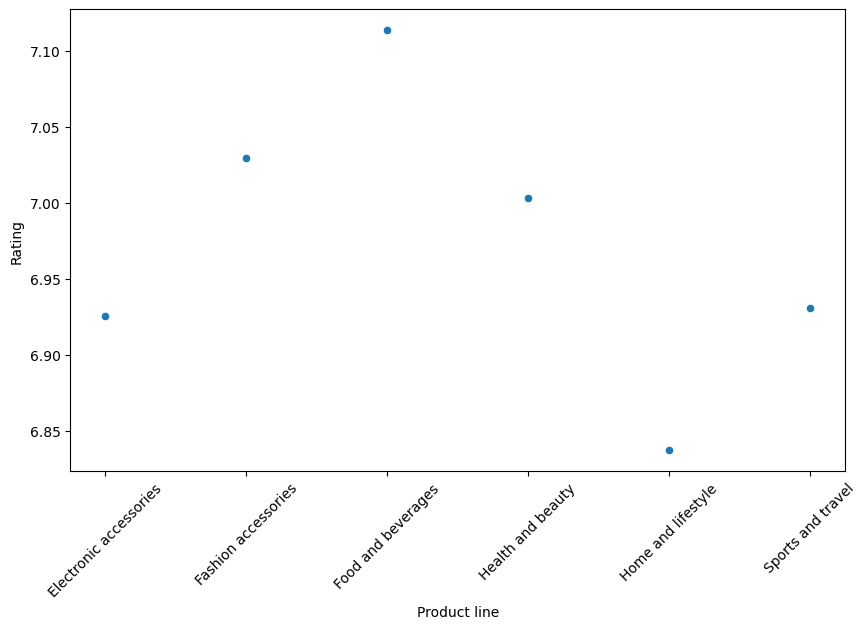

done


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/kaggle/input/supermarket-sales/supermarket sales.csv')
df.head()
grouped_data = df.groupby('Product line')['Rating'].mean()
result = pd.DataFrame({'Rating':grouped_data})

plt.figure(figsize=(10,6))
sns.scatterplot(data = result,x = 'Product line',y = 'Rating')
plt.xticks(rotation=45)
plt.show()
print("done")

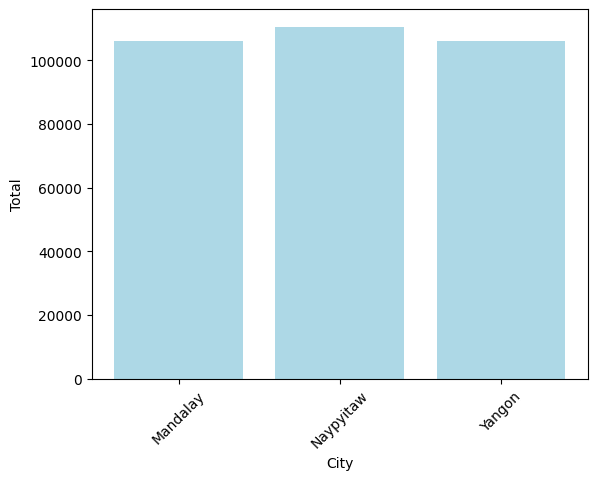

done


In [25]:
# Which City Had the Highest Total Sales
grouped_data = df.groupby('City')['Total'].sum()
result = pd.DataFrame({'Total':grouped_data})
# plt.plot(result, marker = 'o')
plt.bar(result.index, result['Total'], color='lightblue')
plt.xlabel('City')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()
print("done")

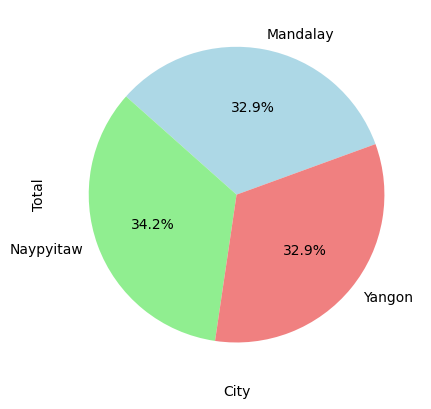

done


In [26]:
grouped_data = df.groupby('City')['Total'].sum()
result = pd.DataFrame({'Total':grouped_data})
# plt.plot(result, marker = 'o')
plt.pie(result['Total'], labels=result.index,autopct='%1.1f%%',colors=['lightblue', 'lightgreen', 'lightcoral'],startangle=20)
plt.xlabel('City')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()
print("done")

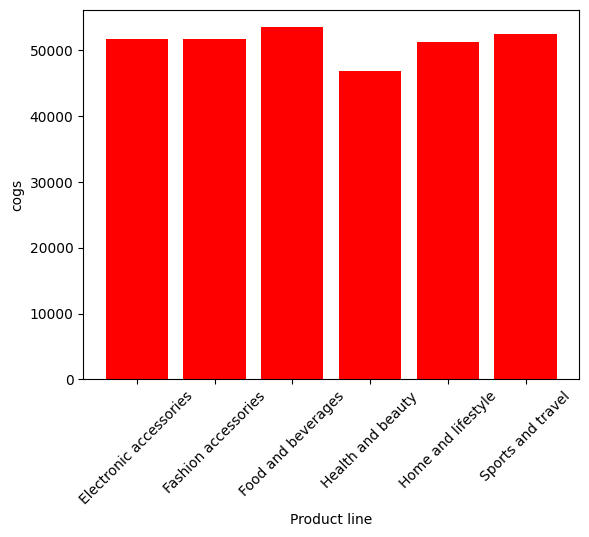

done


In [27]:
grouped_data = df.groupby('Product line')['cogs'].sum()
result = pd.DataFrame({'cogs':grouped_data})
# plt.plot(result, marker = 'o')
plt.bar(result.index, result['cogs'], color='r')

plt.xlabel('Product line')
plt.ylabel('cogs')
plt.xticks(rotation=45)
plt.show()
print("done")

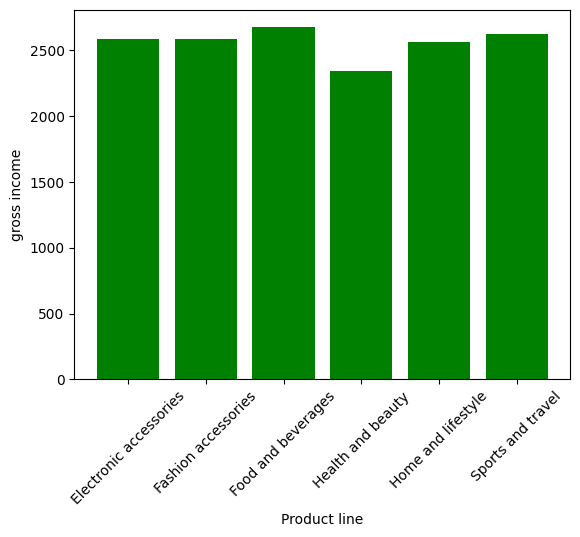

done


In [28]:
grouped_data = df.groupby('Product line')['gross income'].sum()
result = pd.DataFrame({'gross income':grouped_data})
# plt.plot(result, marker = 'o')
plt.bar(result.index, result['gross income'], color='g')
plt.xlabel('Product line')
plt.ylabel('gross income')
plt.xticks(rotation=45)
plt.show()
print("done")

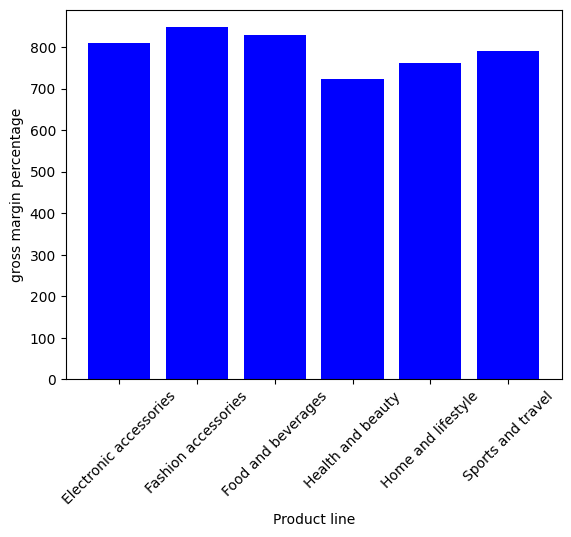

done


In [29]:
grouped_data = df.groupby('Product line')['gross margin percentage'].sum()
result = pd.DataFrame({'gross margin percentage':grouped_data})
# plt.plot(result,marker = 'o')
plt.bar(result.index, result['gross margin percentage'], color='b')
plt.xlabel('Product line')
plt.ylabel('gross margin percentage')
plt.xticks(rotation=45)
plt.show()
print("done")

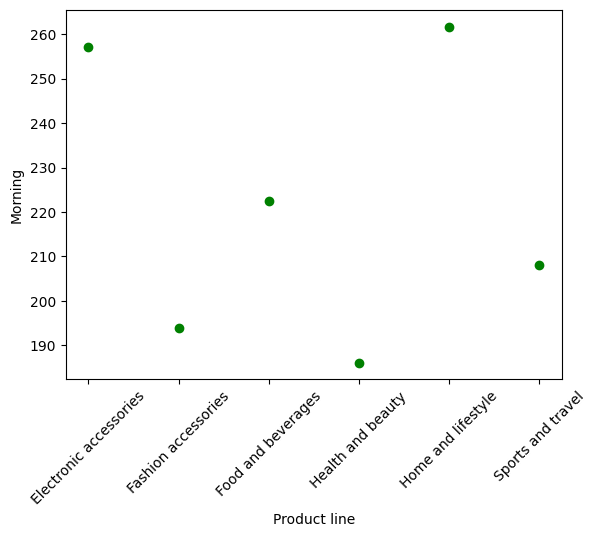

done


In [30]:
df = pd.read_csv('/kaggle/working/dataset_with_time_of_day.csv')
df.head()
df1=df[df['Time of Day']=='Morning']
df2=df[df['Time of Day']=='Afternoon']
df3=df[df['Time of Day']=='Evening']
df4=df[df['Time of Day']=='Night']
grouped_data = df1.groupby('Product line')['Rating'].sum()
result = pd.DataFrame({'Rating':grouped_data})
# plt.plot(result, marker = 'o')
plt.scatter(result.index, result['Rating'], color='g')
plt.xlabel('Product line')
plt.ylabel('Morning')
plt.xticks(rotation=45)
plt.show()
print("done")

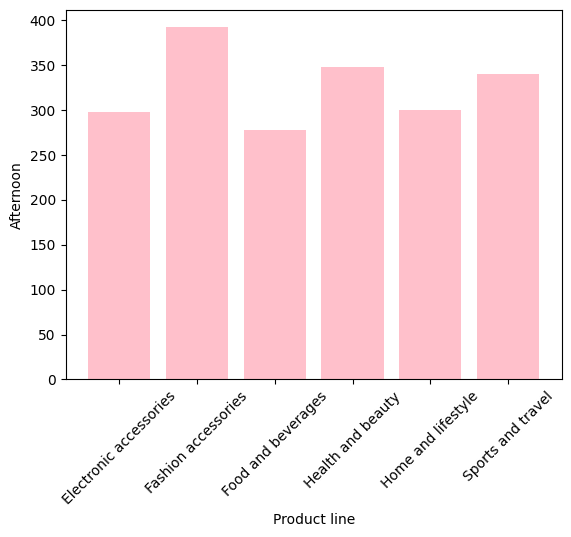

done


In [31]:
grouped_data = df2.groupby('Product line')['Rating'].sum()
result = pd.DataFrame({'Rating':grouped_data})
# plt.plot(result, marker = 'o')
plt.bar(result.index, result['Rating'], color='pink')
plt.xlabel('Product line')
plt.ylabel('Afternoon')
plt.xticks(rotation=45)
plt.show()
print("done")

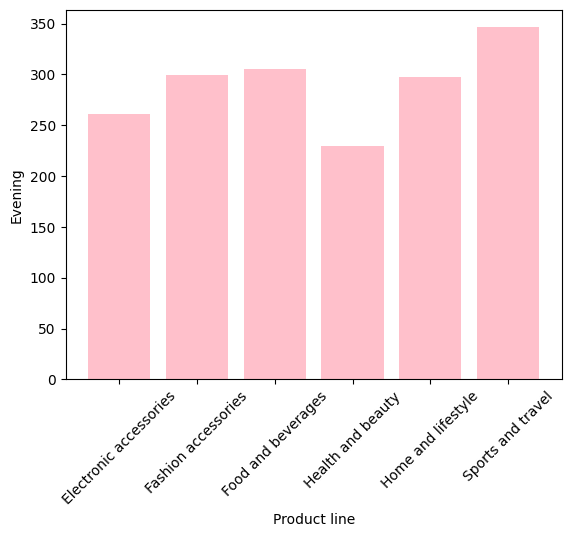

done


In [32]:
grouped_data = df3.groupby('Product line')['Rating'].sum()
result = pd.DataFrame({'Rating':grouped_data})
# plt.plot(result, marker = 'o')
plt.bar(result.index, result['Rating'], color='pink')
plt.xlabel('Product line')
plt.ylabel('Evening')
plt.xticks(rotation=45)
plt.show()
print("done")


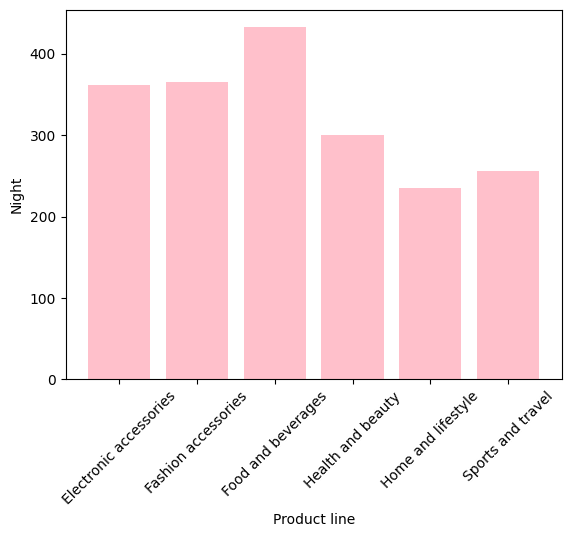

done


In [33]:
grouped_data = df4.groupby('Product line')['Rating'].sum()
result = pd.DataFrame({'Rating':grouped_data})
# plt.plot(result, marker = 'o')
plt.bar(result.index, result['Rating'], color='pink')
plt.xlabel('Product line')
plt.ylabel('Night')
plt.xticks(rotation=45)
plt.show()
print("done")


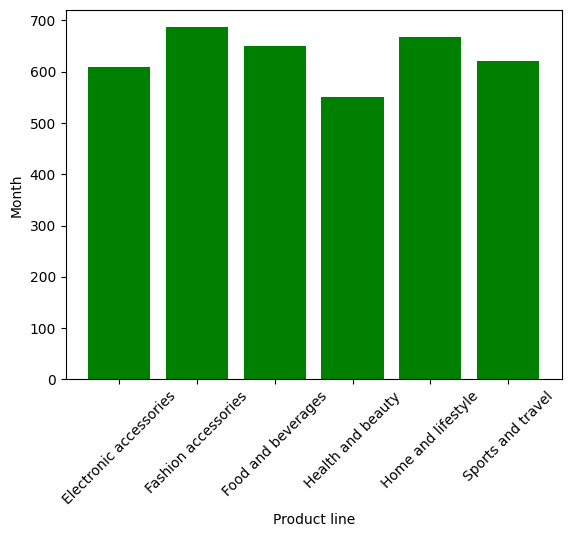

done


In [34]:
grouped_data = df.groupby('Product line')['Month'].sum()
result = pd.DataFrame({'Month':grouped_data})
# plt.plot(result, marker = 'o')
plt.bar(result.index, result['Month'], color='g')
plt.xlabel('Product line')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.show()
print("done")

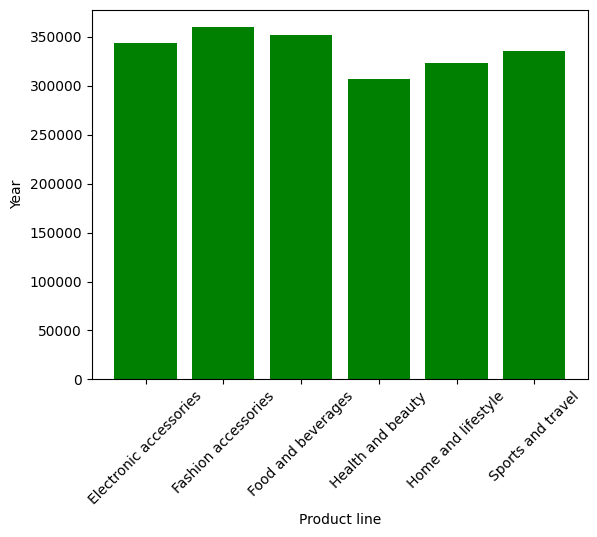

done


In [35]:
grouped_data = df.groupby('Product line')['Year'].sum()
result = pd.DataFrame({'Year':grouped_data})
# plt.plot(result, marker = 'o')
plt.bar(result.index, result['Year'], color='g')
plt.xlabel('Product line')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.show()
print("done")

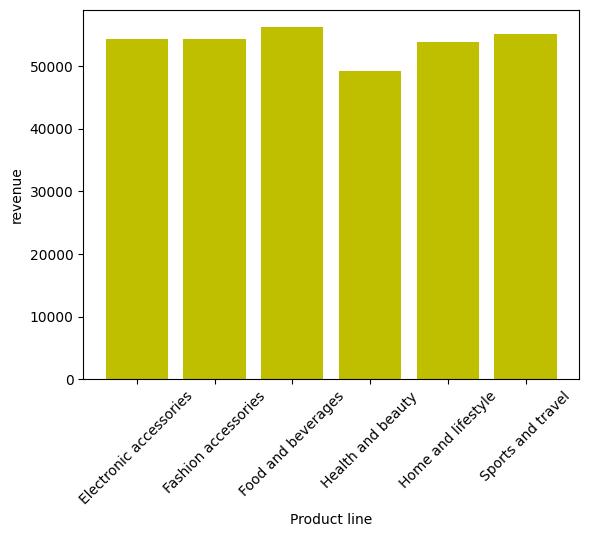

done


In [36]:
grouped_data = df.groupby('Product line')['revenue'].sum()
result = pd.DataFrame({'revenue':grouped_data})
# plt.plot(result, marker = 'o')
plt.bar(result.index, result['revenue'], color='y')
plt.xlabel('Product line')
plt.ylabel('revenue')
plt.xticks(rotation=45)
plt.show()
print("done")

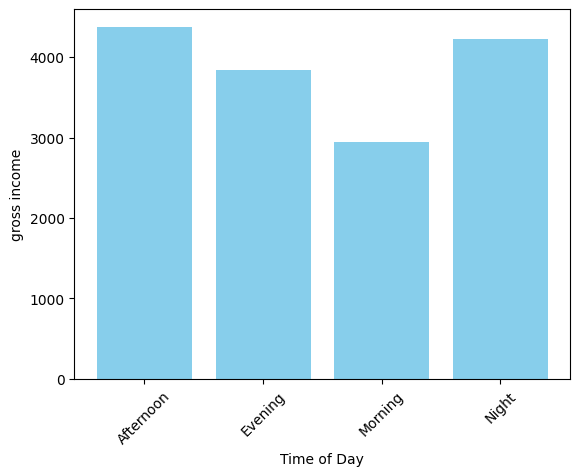

done


In [37]:

grouped_data = df.groupby('Time of Day')['gross income'].sum()
result = pd.DataFrame({'gross income':grouped_data})
# plt.plot(result, marker = 'o')
plt.bar(result.index, result['gross income'], color='skyblue')
plt.xlabel('Time of Day')
plt.ylabel('gross income')
plt.xticks(rotation=45)
plt.show()
print("done")

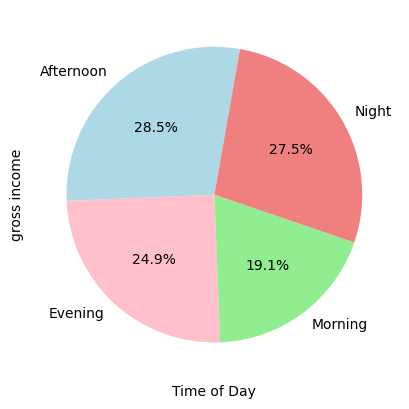

done


In [38]:
grouped_data = df.groupby('Time of Day')['gross income'].sum()
result = pd.DataFrame({'gross income':grouped_data})
plt.pie(result['gross income'], labels=result.index,autopct='%1.1f%%',colors=['lightblue','pink', 'lightgreen', 'lightcoral'],startangle=80)
plt.xlabel('Time of Day')
plt.ylabel('gross income')
plt.xticks(rotation=45)
plt.show()
print("done")